In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
### Part 1

In [3]:
data1_table = np.genfromtxt("resources\Patel\EM2 Part 1.csv", delimiter=',', skip_header=1)
part1 = {
    "frequency": data1_table[:,0], #hz
    "V0": data1_table[:,1],        #volts
    "Vc": data1_table[:,2],        #volts
    "phase": data1_table[:,3],     #degrees
}

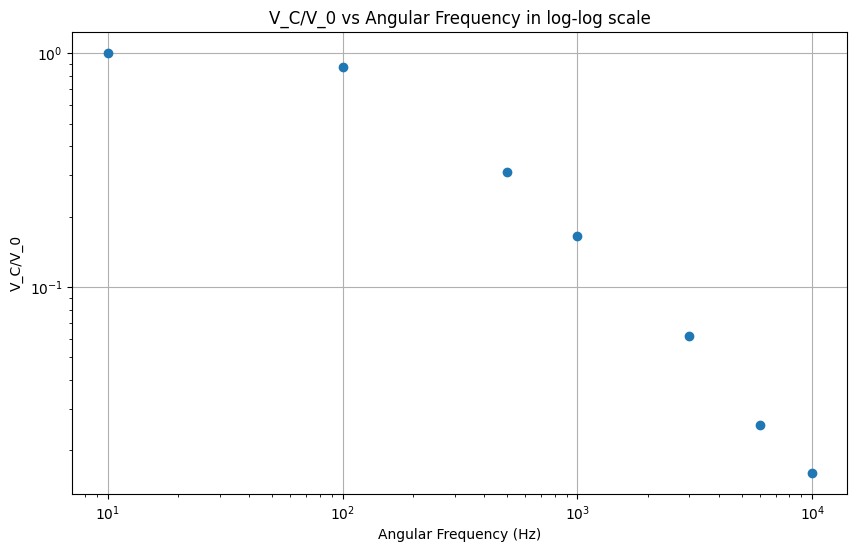

In [4]:
plt.figure(figsize=(10, 6))
plt.loglog(part1["frequency"], part1["Vc"]/part1["V0"], 'o', label="Data")
plt.xlabel("Angular Frequency (Hz)")
plt.ylabel("V_C/V_0")
plt.title("V_C/V_0 vs Angular Frequency in log-log scale")
plt.grid()
plt.show()

In [5]:
def curve_part_1(w, A, tau):
    return A / np.sqrt(1 + (w**2) * (tau**2))

In [6]:
popt, pcov = curve_fit(curve_part_1, part1["frequency"], part1["Vc"]/part1["V0"])
A_opt, tau_opt_2 = popt
A_err, tau_err = np.sqrt(np.diag(pcov))
print("Optimized parameters:")
print("A = {:.4f} +/- {:.4f}".format(A_opt, A_err))
print("tau = {:.4f} +/- {:.4f}".format(tau_opt_2, tau_err))

Optimized parameters:
A = 1.0088 +/- 0.0071
tau = -0.0060 +/- 0.0001


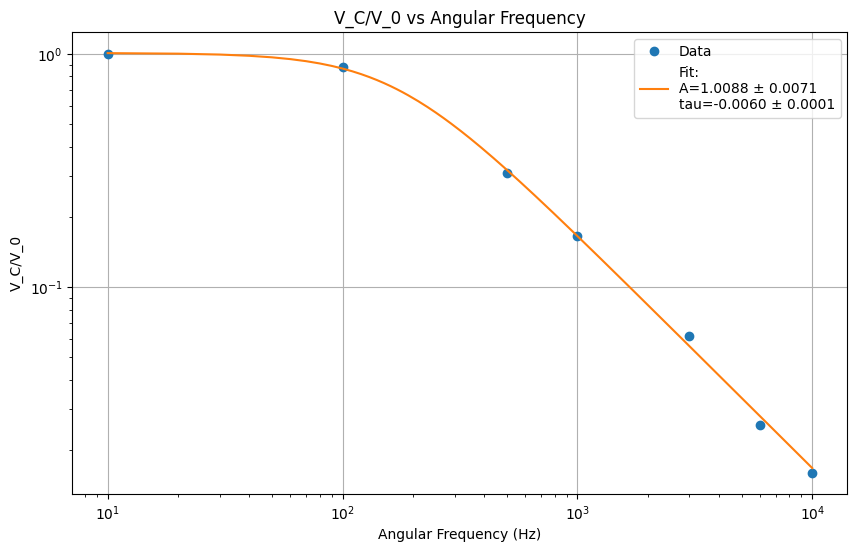

In [7]:
plt.figure(figsize=(10, 6))
plt.loglog(part1["frequency"], part1["Vc"]/part1["V0"], 'o', label="Data")
frequencies = np.linspace(min(part1["frequency"]), max(part1["frequency"]), 1000)
plt.plot(frequencies, curve_part_1(frequencies, *popt), label="Fit:\nA={:.4f} ± {:.4f}\ntau={:.4f} ± {:.4f}".format(A_opt, A_err, tau_opt_2, tau_err))
plt.xlabel("Angular Frequency (Hz)")
plt.ylabel("V_C/V_0")
plt.title("V_C/V_0 vs Angular Frequency")
plt.grid(True)
plt.legend()
plt.show()

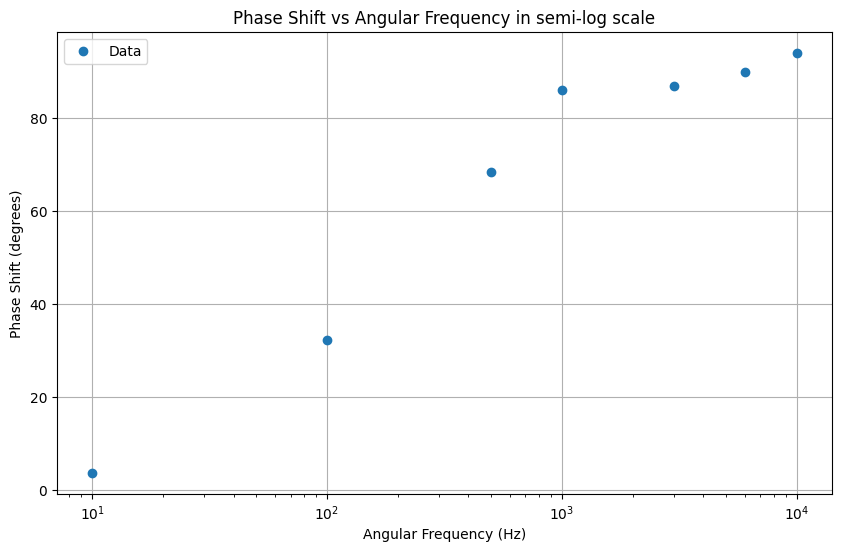

In [8]:
# Phase Shift vs Frequency
plt.figure(figsize=(10, 6))
plt.semilogx(part1["frequency"], part1["phase"], 'o', label="Data")
plt.xlabel("Angular Frequency (Hz)")
plt.ylabel("Phase Shift (degrees)")
plt.title("Phase Shift vs Angular Frequency in semi-log scale")
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# fit using 𝜙𝐶 = tan−1(−𝜔𝑅𝐶).
def curve_phase(w, tau):
    return np.arctan(-w * tau) * 180 / np.pi

popt, pcov = curve_fit(curve_phase, part1["frequency"], part1["phase"])
tau_opt_2 = popt[0]
tau_err = np.sqrt(np.diag(pcov))[0]
print("Optimized parameters:")
print("tau = {:.4f} +/- {:.4f}".format(tau_opt_2, tau_err))

Optimized parameters:
tau = -0.0062 +/- 0.0006


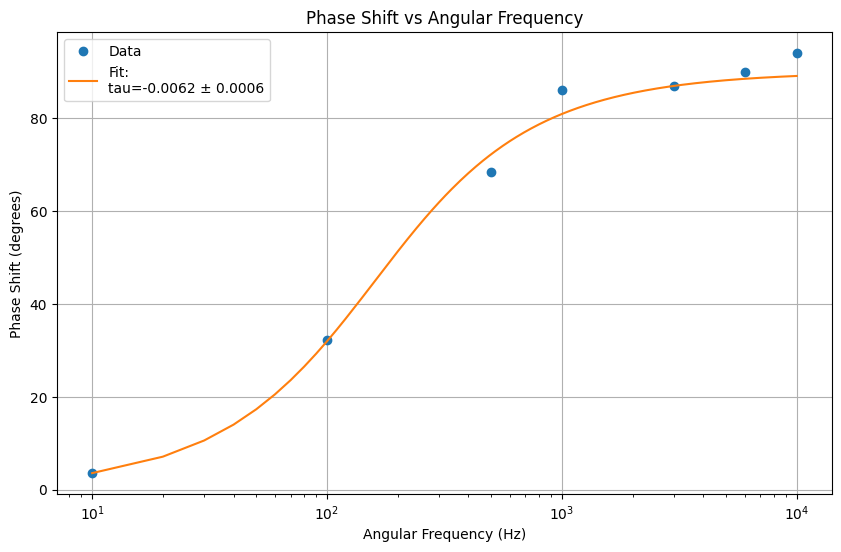

In [10]:
# plot the fit
plt.figure(figsize=(10, 6))
plt.semilogx(part1["frequency"], part1["phase"], 'o', label="Data")
frequencies = np.linspace(min(part1["frequency"]), max(part1["frequency"]), 1000)
plt.plot(frequencies, curve_phase(frequencies, *popt), label="Fit:\ntau={:.4f} ± {:.4f}".format(tau_opt_2, tau_err))
plt.xlabel("Angular Frequency (Hz)")
plt.ylabel("Phase Shift (degrees)")
plt.title("Phase Shift vs Angular Frequency")
plt.grid(True)
plt.legend()
plt.show()

In [11]:
### Part 2

In [12]:
data2_table = np.genfromtxt("resources\Patel\EM2 Part 2.csv", delimiter=',', skip_header=1)
part2 = {
    "frequency": data2_table[:,0], #hz
    "V0": data2_table[:,1],        #volts
    "VL": data2_table[:,2],        #volts
    "phase": data2_table[:,3],     #degrees
}

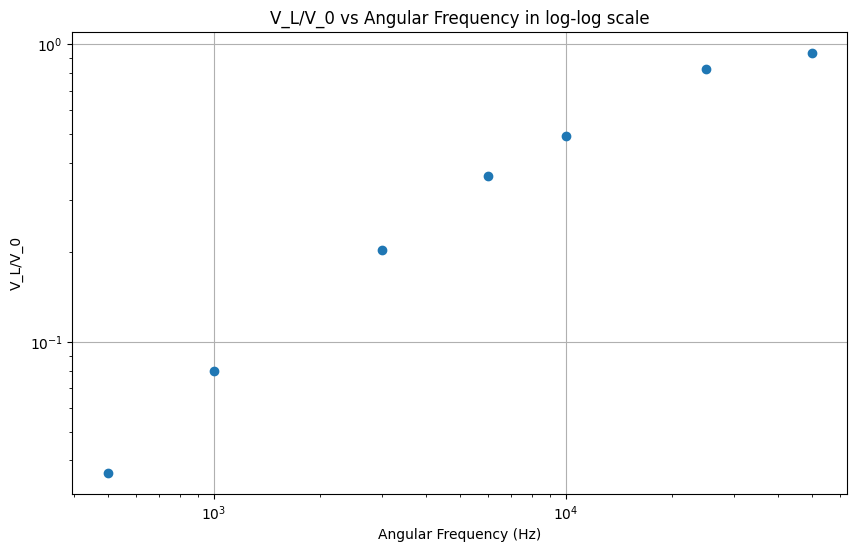

In [13]:
#Plot VL/Vo as a function of angular frequency, using a log-log scale.
plt.figure(figsize=(10, 6))
plt.loglog(part2["frequency"], part2["VL"]/part2["V0"], 'o', label="Data")
plt.xlabel("Angular Frequency (Hz)")
plt.ylabel("V_L/V_0")
plt.title("V_L/V_0 vs Angular Frequency in log-log scale")
plt.grid()
plt.show()

In [14]:
def curve_part_2(w, A, tau):
    return A*w*tau / np.sqrt(1 + (w**2) * (tau**2))

In [15]:
# fit curve to graph
popt, pcov = curve_fit(curve_part_2, part2["frequency"], part2["VL"]/part2["V0"])
A_opt, tau_opt_2 = popt
A_err, tau_err = np.sqrt(np.diag(pcov))
print("Optimized parameters:")
print("A = {:.4f} +/- {:.4f}".format(A_opt, A_err))
print("tau = {:.6f} +/- {:.6f}".format(tau_opt_2, tau_err))

Optimized parameters:
A = 0.9799 +/- 0.0207
tau = 0.000063 +/- 0.000003


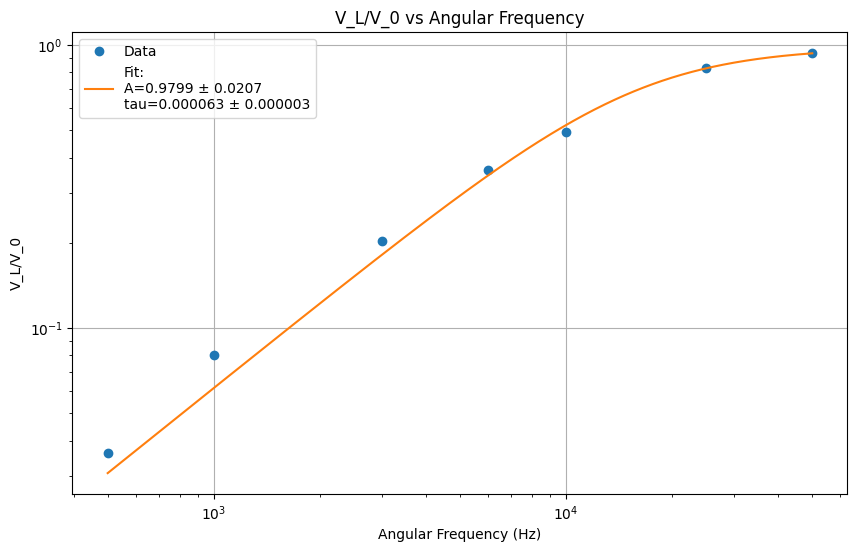

In [16]:
# graph fitted curve
plt.figure(figsize=(10, 6))
plt.loglog(part2["frequency"], part2["VL"]/part2["V0"], 'o', label="Data")
frequencies = np.linspace(min(part2["frequency"]), max(part2["frequency"]), 1000)
plt.plot(frequencies, curve_part_2(frequencies, *popt), label="Fit:\nA={:.4f} ± {:.4f}\ntau={:.6f} ± {:.6f}".format(A_opt, A_err, tau_opt_2, tau_err))
plt.xlabel("Angular Frequency (Hz)")
plt.ylabel("V_L/V_0")
plt.title("V_L/V_0 vs Angular Frequency")
plt.grid(True)
plt.legend()
plt.show()

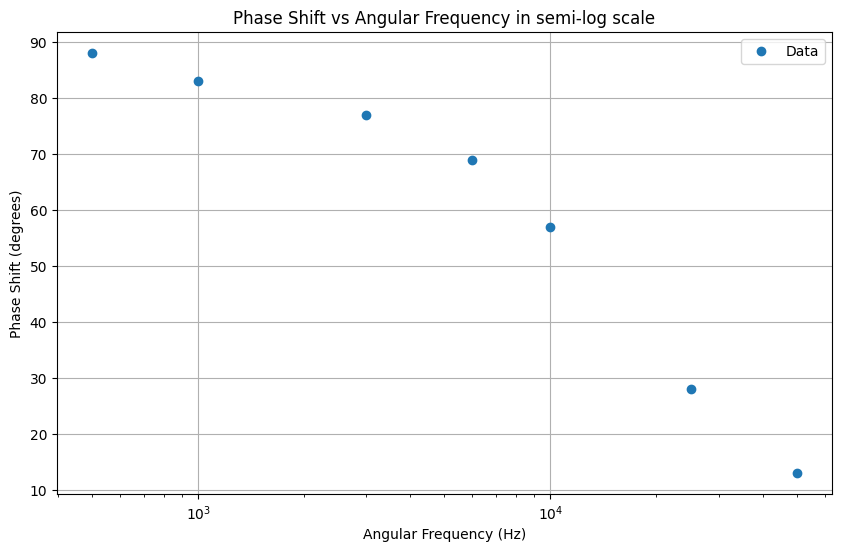

In [17]:
# Plot the phase shift L as a function of angular frequency, using a semi-log scale
plt.figure(figsize=(10, 6))
plt.semilogx(part2["frequency"], part2["phase"], 'o', label="Data")
plt.xlabel("Angular Frequency (Hz)")
plt.ylabel("Phase Shift (degrees)")
plt.title("Phase Shift vs Angular Frequency in semi-log scale")
plt.grid(True)
plt.legend()
plt.show()

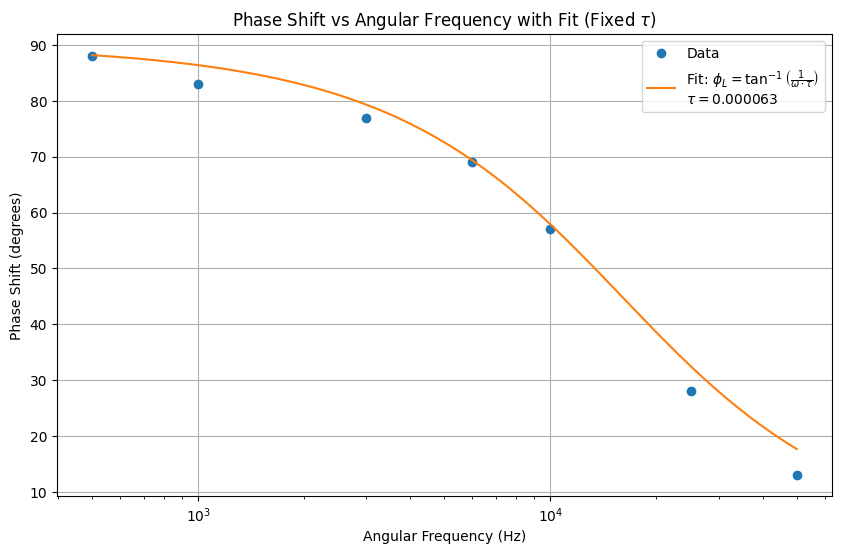

In [18]:
# Fit using 𝜙𝐿 = tan−1(𝑅/𝜔𝐿)
def curve_phase(w, tau):
    return np.arctan(1/(w * tau)) * 180 / np.pi

# Use tau_opt_2 as the fixed value for tau
tau_opt = tau_opt_2
freq_range = np.logspace(np.log10(part2["frequency"].min()), np.log10(part2["frequency"].max()), 1000)
fit_phase = curve_phase(freq_range, tau_opt)

plt.figure(figsize=(10, 6))
plt.semilogx(part2["frequency"], part2["phase"], 'o', label="Data")
plt.semilogx(freq_range, fit_phase, label=f"Fit: $\\phi_L = \\tan^{{-1}}\\left(\\frac{{1}}{{\\omega \\cdot \\tau}}\\right)$\n$\\tau = {tau_opt:.6f}$")
plt.xlabel("Angular Frequency (Hz)")
plt.ylabel("Phase Shift (degrees)")
plt.title("Phase Shift vs Angular Frequency with Fit (Fixed $\\tau$)")
plt.grid(True)
plt.legend()
plt.show()